In [1]:
import pandas as pd
# Read a CSV file
data = pd.read_csv('../../datasets/cleaned_loss_rate_dataset.csv')
# Display the dataframe
data.head(100)

,Month,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales,sale_or_return,discount
0,1,capsicum,Green Hot Peppers,0.475929,8.287794,5.049097,6.72,28.38,sale,False
1,1,capsicum,Green Hot Peppers,0.600000,8.287794,5.049097,6.72,15.48,sale,False
2,1,capsicum,Green Hot Peppers,0.200000,8.287794,5.049097,6.72,5.16,sale,False
3,1,capsicum,Green Hot Peppers,0.300000,8.287794,5.049097,6.72,7.74,sale,False
4,1,capsicum,Green Hot Peppers,0.300000,8.287794,5.049097,6.72,7.74,sale,False
...,...,...,...,...,...,...,...,...,...,...
95,1,mushroom,Xixia Mushroom (1),0.300000,18.000000,13.000000,13.82,5.40,sale,False
96,1,mushroom,Xixia Mushroom (1),0.100000,18.000000,13.000000,13.82,1.80,sale,False
97,1,mushroom,Xixia Mushroom (1),0.100000,18.000000,13.000000,13.82,1.80,sale,False
98,1,mushroom,Xixia Mushroom (1),0.100000,18.000000,13.000000,13.82,1.80,sale,False


In [2]:
data.shape

(475428, 10)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'Loss Rate (%)' is the target variable
y = data['loss_rate_(%)']

# Select features for model training
numerical_columns = ['Month', 'quantity_sold_kg', 'unit_selling_price_rmb/kg', 'wholesale_price_(rmb/kg)', 'total_sales']
categorical_columns = ['category_name', 'item_name', 'sale_or_return', 'discount']

In [4]:
# Extract numerical features
X_numerical = data[numerical_columns]

In [5]:
# Extract categorical features
X_categorical = data[categorical_columns]

In [6]:
# Apply one-hot encoding using pd.get_dummies for categorical variables
X_categorical_encoded = pd.get_dummies(X_categorical, columns=categorical_columns, drop_first=True)
X_categorical_encoded.sample(100)

,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum,item_name_Agaricus Bisporus (Bag),item_name_Aihao,item_name_Amaranth,item_name_Amaranth (Bag),item_name_Apricot Bao Mushroom (1),...,item_name_Yunnan Shengcai,item_name_Yuxingcao (Bag),item_name_Zhijiang Qinggengsanhua,item_name_Zhijiang Red Bolt,item_name_Zhijiang Red Bolt (Bag),item_name_Zhimaxiancai,item_name_Zhuyecai,item_name_Zhuyecai (Bag),sale_or_return_sale,discount_True
418558,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
462688,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
44149,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
146572,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
32960,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399948,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
228225,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34110,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
152192,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [7]:
# Concatenate numerical and encoded categorical features
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [8]:
# Split data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Display the columns of X_test
print("\nColumns of X_test:")
print(X_test.columns)


Columns of X_test:
Index(['Month', 'quantity_sold_kg', 'unit_selling_price_rmb/kg',
       'wholesale_price_(rmb/kg)', 'total_sales', 'category_name_cabbage',
       'category_name_capsicum', 'category_name_flower',
       'category_name_mushroom', 'category_name_solanum',
       ...
       'item_name_Yunnan Shengcai', 'item_name_Yuxingcao (Bag)',
       'item_name_Zhijiang Qinggengsanhua', 'item_name_Zhijiang Red Bolt',
       'item_name_Zhijiang Red Bolt (Bag)', 'item_name_Zhimaxiancai',
       'item_name_Zhuyecai', 'item_name_Zhuyecai (Bag)', 'sale_or_return_sale',
       'discount_True'],
      dtype='object', length=188)


In [10]:
# Initialize and train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Round the MAE to 4 decimal places
rounded_mae = round(mae, 4)

print(f"Mean Absolute Error (MAE): {rounded_mae}")

Mean Absolute Error (MAE): 0.0001


In [12]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print(f"MAE for Lasso Regression: {lasso_mae:.4f}")

MAE for Lasso Regression: 3.6523


In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"MAE for Decision Tree Regressor: {dt_mae:.4f}")

MAE for Decision Tree Regressor: 0.0004


In [14]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Round the MSE to 4 decimal places
rounded_mse = round(mse, 4)

print(f"Mean Squared Error (MSE): {rounded_mse}")

Mean Squared Error (MSE): 0.0004


In [15]:
# Predict Loss Rate for the first 5 values in the test data
X_test_subset = X_test.head()
predictions = model.predict(X_test_subset)

# Display the results along with Month, Item Name, Category Name, and Discount information
result_df = pd.DataFrame({
    'Month': data.loc[X_test_subset.index, 'Month'],  # Assuming 'Month' is the original month numbers
    'Predicted Loss Rate (%)': predictions
})
result_df.head()

,Month,Predicted Loss Rate (%)
33771,2,10.80
11108,1,13.82
317832,4,5.70
371715,7,24.05
256082,12,5.54


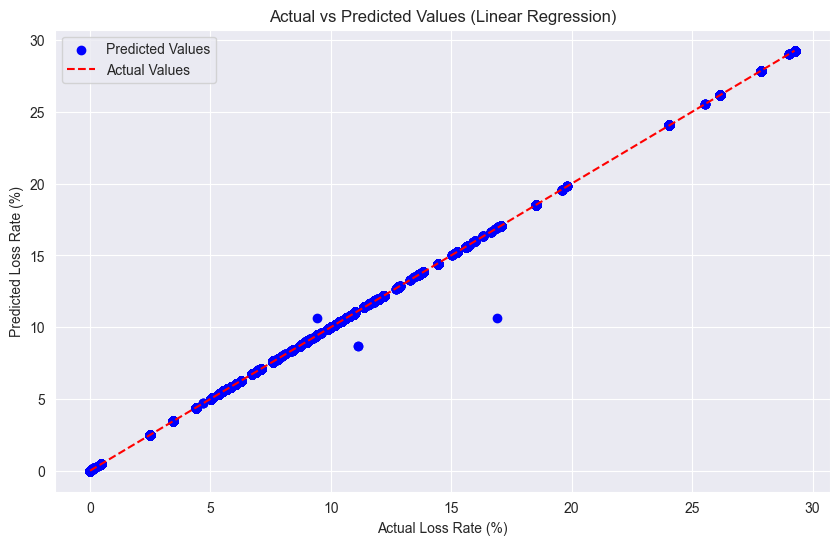

In [16]:
import matplotlib.pyplot as plt
# Visualize actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

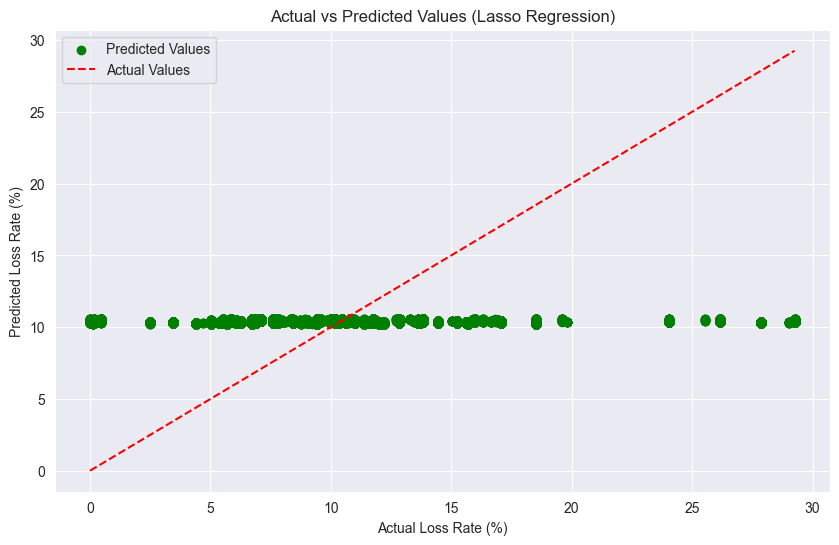

In [17]:
# Visualize actual vs predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='green', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.legend()
plt.show()


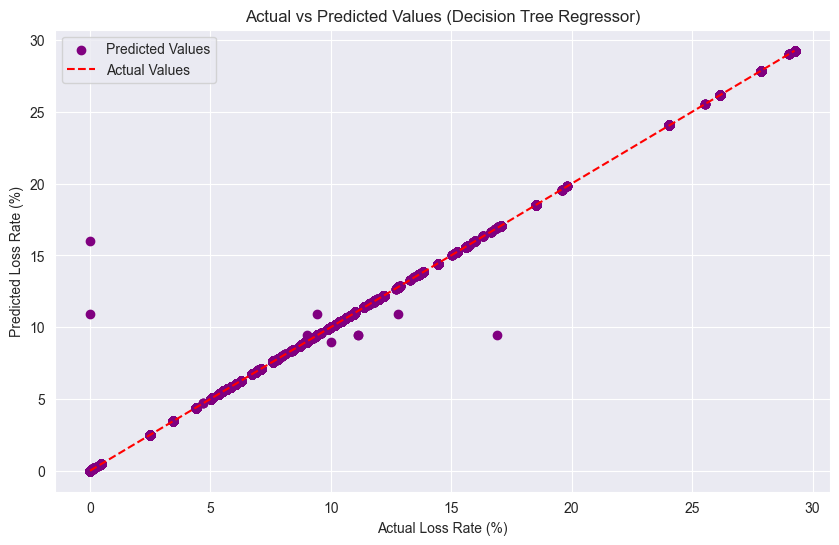

In [18]:
# Visualize actual vs predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='purple', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.legend()
plt.show()

In [19]:
y_test[:5]

33771     10.80
11108     13.82
317832     5.70
371715    24.05
256082     5.54
Name: loss_rate_(%), dtype: float64

In [20]:
predictions[:5]

array([10.8 , 13.82,  5.7 , 24.05,  5.54])

In [21]:
y_test.shape[0]

118857

In [22]:
import pickle

# save model
with open('lossRatemodel.pickle', 'wb') as file:
    pickle.dump(model, file)
    